# import

In [1]:
#LOCATE = 'home'
LOCATE='T490'
IDE = 'JUPYTER'
# IDE = 'VS'

import time

def monotonic():
    if LOCATE=='home':
        return time.monotonic_ns()
    else:
        return time.monotonic()
if IDE == 'JUPYTER':
    #代码自动完成
    %config IPCompleter.greedy=True 
import tensorflow as tf
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

import math
from matplotlib.pyplot import imshow
if IDE == 'JUPYTER':
    %matplotlib inline
#CIFAR_DIR = "./../../cifar-10-batches-py"
if LOCATE=='home':
    CIFAR_DIR = 'V:\DATA\cifar-10-batches-py'
else :
    CIFAR_DIR = 'd:\Alan\data\cifar-10-batches-py'
print(os.listdir(CIFAR_DIR))

def time_str(t):
    return time.strftime("%Y%m%d-%H:%M:%S", t)

def time_now(begin_time=0):    
    t=time.localtime()
    if begin_time==0:
        return time_str(t)
    else:
        end_time=monotonic()
        elaps = end_time - begin_time
#         elaps_sec = elaps/10**9 if LOCATE=='home' else elaps
        return '%s. Time used: %.3f s.'%(time_str(t), elaps/((10**9) if LOCATE=='home' else 1))

def get_timestamp():
    return monotonic()
    
print(time_now())
t0=get_timestamp()
for i in range(1234567):
    i=i
print(time_now(t0))

['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'readme.html', 'test_batch']
20200329-21:16:46
20200329-21:16:46. Time used: 0.093 s.


# display var

In [2]:
import inspect
import copy
def retrieve_name_ex(var,level=0):    
    stacks = inspect.stack()    
    try:        
        callFunc = stacks[level].function        
        code = stacks[level+1].code_context[0]        
        startIndex = code.index(callFunc)        
        startIndex = code.index("(", startIndex + len(callFunc)) + 1        
        endIndex = code.index(")", startIndex)        
        return code[startIndex:endIndex].strip()    
    except:        
        return ""

def outputVar(var,level=1,index=-1,end_str='\n'):               
#     print("{} [0x{}] = {}".format(retrieve_name_ex(var,1),var))   
    if index==-1:
        var_name=retrieve_name_ex(var,level)        
    else:
        var_name='%s[%d]'%(retrieve_name_ex(var,level),index)
    val='{}.'.format(var)
    print('%-10s[0x%012lx]=%-15s'%(var_name,id(var),val),end=end_str)
    
def output_var(var,level=1,index=-1,end_str='\n'):               
    if index==-1:
        var_name=retrieve_name_ex(var,level)        
    else:
        var_name='%s[%d]'%(retrieve_name_ex(var,level),index)
    val='{}.'.format(var)
    print('%s = %s'%(var_name,val),end=end_str)

def getVarName(var,level=1,index=-1):
    if index==-1:
        var_name=retrieve_name_ex(var,level)        
    else:
        var_name='%s[%d]'%(retrieve_name_ex(var,level),index)
    return var_name

def print_var(var,level=1,index=-1):
    print(getVarName(var,2),'=',var)
    
a=[1,2,3]
print_var(a)
    
def output_child(arr):
    s=retrieve_name_ex(arr,1)
    for i in range(len(arr)):
        outputVar(arr[i],2,i,'')
    print('\n',end='')
a=[[1,2],[2],[3]]
b_sgn=a          # 赋值(相当于C++中的引用)
b_spl=a[:]       # 浅拷贝
b_dp=copy.deepcopy(a) # 深拷贝
outputVar(a)
outputVar(b_sgn)
outputVar(b_spl)
outputVar(b_dp)
output_child(a)
output_child(b_sgn)
output_child(b_spl)
output_child(b_dp)
a[0].append(3)
print('--- After a[0].append(3). ---')
outputVar(a)
outputVar(b_sgn)
outputVar(b_spl)
outputVar(b_dp)
output_child(a)
output_child(b_sgn)
output_child(b_spl)
output_child(b_dp)

a[0]=1
print('--- After a[0]=1. ---')
outputVar(a)
outputVar(b_sgn)
outputVar(b_spl)
outputVar(b_dp)
output_child(a)
output_child(b_sgn)
output_child(b_spl)
output_child(b_dp)

a = [1, 2, 3]
a         [0x01cce5b74a88]=[[1, 2], [2], [3]].
b_sgn     [0x01cce5b74a88]=[[1, 2], [2], [3]].
b_spl     [0x01cce5b74ac8]=[[1, 2], [2], [3]].
b_dp      [0x01cce5b9ebc8]=[[1, 2], [2], [3]].
a[0]      [0x01cce5b74948]=[1, 2].        a[1]      [0x01cce5b74288]=[2].           a[2]      [0x01cccdfb9f88]=[3].           
b_sgn[0]  [0x01cce5b74948]=[1, 2].        b_sgn[1]  [0x01cce5b74288]=[2].           b_sgn[2]  [0x01cccdfb9f88]=[3].           
b_spl[0]  [0x01cce5b74948]=[1, 2].        b_spl[1]  [0x01cce5b74288]=[2].           b_spl[2]  [0x01cccdfb9f88]=[3].           
b_dp[0]   [0x01cce5b74908]=[1, 2].        b_dp[1]   [0x01cce5b74b48]=[2].           b_dp[2]   [0x01cce5b74b88]=[3].           
--- After a[0].append(3). ---
a         [0x01cce5b74a88]=[[1, 2, 3], [2], [3]].
b_sgn     [0x01cce5b74a88]=[[1, 2, 3], [2], [3]].
b_spl     [0x01cce5b74ac8]=[[1, 2, 3], [2], [3]].
b_dp      [0x01cce5b9ebc8]=[[1, 2], [2], [3]].
a[0]      [0x01cce5b74948]=[1, 2, 3].     a[1]      [0x01cce5b7

$ P(A \mid B) = \frac{P(B \mid A) , P(A)}{P(B)} $

$ \frac 1 2 $
$\vec{x}\stackrel{\mathrm{def}}{=} (x_1, ..., x_n)$

## tag_print

In [3]:
def remove_sufix(s, redundance_flag):
    '''去除字符串尾部多余的部分'''
    index = s.find(redundance_flag)
    if index >= 0:
        return s[0:index-1]
    else:
        return s
    
def add_match_parentheses(s):
    left_pt_cnt=0
    right_pt_cnt=0
    for c in s:
        if c=='(':
            left_pt_cnt += 1
        elif c==')':
            right_pt_cnt += 1
    if left_pt_cnt - right_pt_cnt <=0:
        return s
    for i in range(left_pt_cnt - right_pt_cnt):
        s += ')'
    return s

g_print_flag = False

def tag_print(var, memo='', tag='', level_plus=0, display=True, big_list=False):
    if display == False:
        return
    if tag == '':
        tag = getVarName(var,level=2+level_plus)
        if g_print_flag:
            print('getVarName=',tag)
        tag = remove_sufix(tag,getVarName(var))
        tag = remove_sufix(tag,getVarName(memo))
        tag = remove_sufix(tag,getVarName(display))
        tag = remove_sufix(tag,getVarName(big_list))
        tag = add_match_parentheses(tag)
    enter_str_after_var = ''  
    shape_str = '{shape}\t'.format(shape= '-' )
    if type(var) == np.ndarray or type(var) == np.matrix:
        shape_str = '{shape}\t'.format(shape=var.shape)        
        if(len(var.shape) > 1 and var.shape[0] > 1):
            enter_str_after_var = '\n'  
    if memo != '':
        memo = '\n' + memo
    type_str = '{type}\t'.format(type=type(var))
      
    print('{memo}\n{type_str}{shape_str}{tag} = {enter}{mat}'.
          format(memo=memo,type_str=type_str,shape_str=shape_str,tag=tag,mat=var,type=type(var),enter=enter_str_after_var))
    
def tp(var, memo='', tag='', level_plus=0, display=True, big_list=False):
    tag_print(var=var, memo=memo, tag=tag, level_plus=1, display=display, big_list=big_list)
    
def tags_print(**vars):
    for first_part,second_part in vars.items():
        tag_print(tag=first_part,var=second_part)
        
def tps(**vars):
    for first_part,second_part in vars.items():
        tag_print(tag=first_part,var=second_part)
    
z0=0.5
tp(z0)
tp(np.mat(z0))
a=np.array([[1,2,3],[4,5,6]])
tp(a)
tp(a*a)

tp(a.dot(a.T))
tp(a.T.dot(a))

c=[[1,2],[3,4]]
tp(c)
mc=np.mat(c)
tp(mc)
tp(mc**2)
b=list(range(10))
ma=np.mat(a)
tp(np.mat(a))
mb=np.mat(b)
# c=ma*ma.T
tp(ma*ma.T)
tp(ma.T*ma)
tp(np.array(ma))
tags_print(b=b,a=a)

# def total(a=5,  **phonebook):
# #     print('a', a)
#     #遍历元组中的所有项目
# #     for single_item in numbers:
# #         print('single_item', single_item)
#     #遍历字典中的所有项目
#     for first_part, second_part in phonebook.items():
#         print(first_part,second_part)
# print(total(10,Jack=1123,John=2231,Inge=1560))


<class 'float'>	-	z0 = 0.5

<class 'numpy.matrix'>	(1, 1)	np.mat(z0) = [[0.5]]

<class 'numpy.ndarray'>	(2, 3)	a = 
[[1 2 3]
 [4 5 6]]

<class 'numpy.ndarray'>	(2, 3)	a*a = 
[[ 1  4  9]
 [16 25 36]]

<class 'numpy.ndarray'>	(2, 2)	a.dot(a.T) = 
[[14 32]
 [32 77]]

<class 'numpy.ndarray'>	(3, 3)	a.T.dot(a) = 
[[17 22 27]
 [22 29 36]
 [27 36 45]]

<class 'list'>	-	c = [[1, 2], [3, 4]]

<class 'numpy.matrix'>	(2, 2)	mc = 
[[1 2]
 [3 4]]

<class 'numpy.matrix'>	(2, 2)	mc**2 = 
[[ 7 10]
 [15 22]]

<class 'numpy.matrix'>	(2, 3)	np.mat(a) = 
[[1 2 3]
 [4 5 6]]

<class 'numpy.matrix'>	(2, 2)	ma*ma.T = 
[[14 32]
 [32 77]]

<class 'numpy.matrix'>	(3, 3)	ma.T*ma = 
[[17 22 27]
 [22 29 36]
 [27 36 45]]

<class 'numpy.ndarray'>	(2, 3)	np.array(ma) = 
[[1 2 3]
 [4 5 6]]

<class 'list'>	-	b = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<class 'numpy.ndarray'>	(2, 3)	a = 
[[1 2 3]
 [4 5 6]]


# class CifarData

In [4]:
def load_data(filename):
    """read data from data file."""
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        return data[b'data'], data[b'labels']

# tensorflow.Dataset.
class CifarData:
    def __init__(self, filenames, need_shuffle):
        all_data = []
        all_labels = []
        for filename in filenames:
            data, labels = load_data(filename)
            for item, label in zip(data, labels):
                if label in [0, 1]:
                    all_data.append(item)
                    all_labels.append(label)
        self._data = np.vstack(all_data)
        self.orignal_data = self._data
        self._data = self._data / 127.5 - 1
        self._labels = np.hstack(all_labels)
#         print("data.shape:  ",self._data.shape)
#         print("labels.shape:",self._labels.shape)
        
        self._num_examples = self._data.shape[0]
        self._need_shuffle = need_shuffle
        self._indicator = 0
        if self._need_shuffle:
            self._shuffle_data()            
        self.len=self._num_examples
            
    def _shuffle_data(self):
        # [0,1,2,3,4,5] -> [5,3,2,4,0,1]
        p = np.random.permutation(self._num_examples)
        self._data = self._data[p]
        self._labels = self._labels[p]
    
    def next_batch(self, batch_size):
        """return batch_size examples as a batch."""
        end_indicator = self._indicator + batch_size
        if end_indicator > self._num_examples:
            if self._need_shuffle:
                self._shuffle_data()
                self._indicator = 0
                end_indicator = batch_size
            else:
                raise Exception("have no more examples")
        if end_indicator > self._num_examples:
            raise Exception("batch size is larger than all examples")
        batch_data = self._data[self._indicator: end_indicator]
        batch_labels = self._labels[self._indicator: end_indicator]
        self._indicator = end_indicator
        return batch_data, batch_labels    
    
    def show_img(self,index):
        if index>=self.len:
            print('索引越界')
            return
        img=self.orignal_data[index]
        img2=img.reshape((3,32,32))
        img3=img2.transpose((1,2,0))
#         imshow(img3)
#         _img_=img.reshape((3,32,32))
        plt.imshow(img3)
        plt.show()
        return    
    

train_filenames = [os.path.join(CIFAR_DIR, 'data_batch_%d' % i) for i in range(1, 6)]
test_filenames = [os.path.join(CIFAR_DIR, 'test_batch')]

train_data = CifarData(train_filenames, True)
test_data = CifarData(test_filenames, False)

class_names=["airplane","auto","bird","cat","deer","dog","frog","horse","ship","truck"];

def TEST_class_CifarData_and_show_img():
    for i in range(1):
        print('\nNo. %d: label[%d] %s' % (i, test_data._labels[i], class_names[test_data._labels[i]]))
        test_data.show_img(i)

In [5]:

# print(w)
s=np.array([2,3,1])
w=dict()
for i in range(0,len(s)-1):
    a=s[i+1]
    b=s[i]
    w[i]=np.random.rand(a,b)
# print(w)
z=dict()
z[1]=np.random.rand(2,3)
i=1
# print('z[{i}]=\n{zi}'.format(i=i,zi=z[i]))
# print('a={a}'.format(a=3))
a=np.random.rand(1,3)
b=np.random.rand(3,2)
c=a.dot(b)
tag_print(c)
a=list(range(5,0,-1))
output_var(a)
a[1]=np.zeros(2)
output_var(a)



<class 'numpy.ndarray'>	(1, 2)	c = [[1.1279655  1.48440108]]
a = [5, 4, 3, 2, 1].
a = [5, array([0., 0.]), 3, 2, 1].


# BP

## sigmoid

In [6]:
def sigmoid(x):
    y=1/(1+np.exp(-x))
    return y

def sigmoid_diff(x):
    f=sigmoid(x)
    diff=f-f*f
    return diff

x=np.array([[1,2,3]])
print(x.shape)
print(sigmoid(x))
print(sigmoid_diff(x))
print(np.transpose(x).shape)
print(np.transpose(x))

(1, 3)
[[0.73105858 0.88079708 0.95257413]]
[[0.19661193 0.10499359 0.04517666]]
(3, 1)
[[1]
 [2]
 [3]]


In [7]:
d=dict()
d[1]=1
not(1 in d)

False

## show_fun

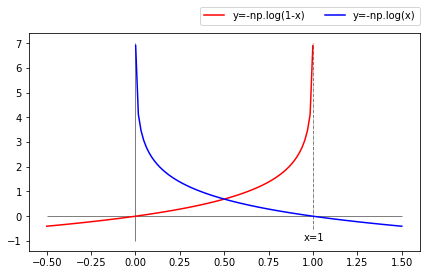

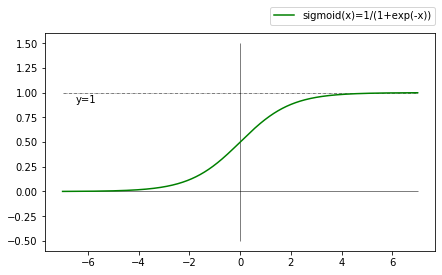

In [8]:
DATA_DICT='data_dict'
FIG_LABEL='label'
X_LABEL='x'
Y_LABEL='y'
COLOR='color'

    
def show_dicts(dicts, figsize = (12,9), in_one_figure = True):
    if in_one_figure:
        plt.figure(figsize=figsize)
    index = 0
    plots=[]
    plot_tags=[]
    for d in dicts:       
        if type(d)!=dict or not(DATA_DICT in d) or type(d[DATA_DICT])!=dict or len(d[DATA_DICT].items())==0:
            continue
        plt.plot(list(d[DATA_DICT].keys()), list(d[DATA_DICT].values()),color=d[COLOR],label=d[Y_LABEL])  
        
        if not in_one_figure:
            if X_LABEL in d:
                plt.xlabel(d[X_LABEL])
            if Y_LABEL in d:
                plt.ylabel(d[Y_LABEL])
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,ncol=3, borderaxespad=0.)

def show_dict(d,figsize=(12,9),color='blue',y_label='Y'):
    tmp_d=dict()
    tmp_d[DATA_DICT]=d
    tmp_d[COLOR]=color
    tmp_d[Y_LABEL]=y_label
    dicts=[0]
    dicts[0]=tmp_d
    show_dicts(dicts,figsize=figsize)
    
def draw_axis(x_from,x_to,y_from,y_to):
    color='black'
    linewidth=0.5    
    plt.vlines(0,y_to,y_from,color = color, linewidth = linewidth)
    plt.hlines(0,x_from,x_to,color = color, linewidth = linewidth)

def init_func_dicts(n):
    y=list(range(n))
    for i in range(n):
        y[i]=dict()
        y[i][DATA_DICT]=dict()
    return y

def TEST_show_fun():
    y = init_func_dicts(5)
    for x in np.linspace(-0.5,0.999,100):
        y[0][DATA_DICT][x] = -np.log(1 - x)
    y[0][COLOR] = 'red'
    y[0][Y_LABEL] = 'y=-np.log(1-x)'
    for x in np.linspace(0.001,1.5,100):
        y[1][DATA_DICT][x] = -np.log(x)
    y[1][COLOR] = 'blue'
    y[1][Y_LABEL] = 'y=-np.log(x)'

    show_dicts(y,figsize=(7,4))
    aux_color = 'black'
    aux_linewidth = 0.5
    aux_linestyle = '-.'
    draw_axis(-0.5,1.5,-1,7)
    plt.vlines(1,-0.5,7,color = aux_color, linewidth = aux_linewidth, linestyle=aux_linestyle)
    plt.annotate("x=1",(1,-0.5),xytext=(0.95,-1))
    plt.show()

    y = init_func_dicts(5)
    x_from = -7
    x_to = 7
    for x in np.linspace(x_from,x_to,1000):
        y[0][DATA_DICT][x] = 1 / (1 + np.exp(-x))
    y[0][COLOR] = 'green'
    y[0][Y_LABEL] = 'sigmoid(x)=1/(1+exp(-x))'
    show_dicts([y[0]],figsize=(7,4),in_one_figure=True)
    draw_axis(x_from,x_to,-0.5,1.5)
    plt.hlines(1,x_from,x_to,color = aux_color, linewidth = aux_linewidth, linestyle=aux_linestyle)
    plt.annotate("y=1",(-5,1) ,xytext=(-6.5,0.9))
    plt.show()

if IDE == 'JUPYTER':
    TEST_show_fun()

In [9]:
a=np.array([1,2,3])
tp(a*a)
b=np.array([[1,2,3],[3,4,5]])
# ma_1=np.mat([1,2,3])
# tp(ma_1)
# tp(ma_1[0,2])
# ma=np.mat(a).T
# mb=np.mat(b[1]).T
# tp(ma)
# tp(mb)
# tp(ma/mb)

# ya = np.mat(b[:,2])
# tp(np.mat(b))

tp(b)
tp(np.mat(b[:,1]))
mb=np.mat(b)
tp(mb)
tp(np.mat(mb[:,1]))
# df_dev_dx = np.zeros([2,3])
# tp(df_dev_dx)
# tp(ma**2)#矩阵乘幂
# tp(a)
# tp(a*a)
# tp(a.T*a)
# tp(ma)
# tp(np.array(ma))
# tp(np.array(ma.tolist()))
# c=np.array(ma.tolist())
# tp(c)
# tp(c*c)
# tp(c.T*c)
# tp(c*c.T)
# tp(c.T.dot(c))
# tp(c.dot(c.T))

# tp(mb)
# tp(np.diag(ma*mb.T))
# tp(np.array(ma))
# tp(np.array(mb).T)
# tp((np.array(ma)*np.array(mb).T))



<class 'numpy.ndarray'>	(3,)	a*a = [1 4 9]

<class 'numpy.ndarray'>	(2, 3)	b = 
[[1 2 3]
 [3 4 5]]

<class 'numpy.matrix'>	(1, 2)	np.mat(b[:,1]) = [[2 4]]

<class 'numpy.matrix'>	(2, 3)	mb = 
[[1 2 3]
 [3 4 5]]

<class 'numpy.matrix'>	(2, 1)	np.mat(mb[:,1]) = 
[[2]
 [4]]


## 函数求导

In [10]:

# 计算损失函数求导
# from sympy import *
import sympy as sy

def sigmoid_sy(x):
    y = 1 / (1 + sy.exp(-x))
    return y

def sigmoid_diff(x):
    f = sigmoid(x)
    diff = f - f * f
    return diff

# def covert_sigle_to_array(x):
#     '''将单个数转换成矩阵形式'''
#     x = np.array(x)
#     if len(x.shape)==0:
#         x=np.array([x])
#     return x

x = sy.symbols("x")  # 符号x，自变量
y = x ** 2 + 3 * x
dify = sy.diff(y,x) #求导
# print(dify) #打印导数#给定x值，求对应导数的值
                # print(dify.subs('x',1))
z = sy.symbols('z')
y = sy.symbols('y')
L = sy.symbols('L')

L = -y * sy.log(sigmoid_sy(z)) - (1 - y) * (sy.log(1 - sigmoid_sy(z)))
dL_python = sy.diff(L,z)

tp(L)
tp(sy.diff(L,z))

# dL_alan=-y*(1-sigmoid(z))+(1-y)*sigmoid(z)

z0=0.7
y0=1

z1 = np.mat([0.7,0.2,0.5]).T
y1 = np.mat([1,0,1]).T

z2 = np.mat([[0.7,0.2,0.5],[0.6,0.3,0.8]]).T
y2 = np.mat([[1,0,1],[1,1,0]]).T

tags_print(z0=z0,y0=y0,z1=z1,y1=y1,z2=z2,y2=y2)

def multiply_pow(a,n):
    a=np.mat(a)
    r=1
    for i in range(abs(n)):
        r = np.multiply(r, a)
    if n<0:
        r=1/r
    return r

# tp(multiply_pow([1,2,3],3))
    
def dLdz_py(y,z):
    y=np.mat(y)
    z=np.mat(z)
    r = np.multiply(-y, np.exp(-z)/(1 + np.exp(-z))) \
        + np.multiply(1-y, \
                       np.exp(-z)/(np.multiply(1 - 1/(1 + np.exp(-z)), \
                                            multiply_pow(1 + np.exp(-z), 2))))
#     -y*exp(-z)/(1 + exp(-z)) \
#         + (-y + 1) * \
#             exp(-z) / \
#                 ((1 - 1/(1 + exp(-z))) * (1 + exp(-z))**2)
    return r

def dLdz_alan(y,z):
    y=np.mat(y)
    z=np.mat(z)
    dldz = np.multiply(-y, 1 - sigmoid(z)) + np.multiply(1 - y, sigmoid(z))
    return dldz

def Loss(y,z, get_average=False):
    y = np.mat(y)
    z = np.mat(z)
    a = sigmoid(z)    
    r = -y.T * (np.log(sigmoid(z))) - (1 - y.T) * (np.log(1 - sigmoid(z)))
    if get_average:
        r=np.average(r)
    return r

tag_print(Loss(y0,z0))
tag_print(L.subs(y,y0).subs(z,z0))
          
tag_print(Loss(y1,z1))


def dydz(f, x, rate,need_print=False): 
    '''通过[f(x1)-f(x1+delta)]/delta (delta为微量，一般取 0.0001*x1 或更小)这种近似方式求f在x1处的导数，以验证求导公式'''
    
    # x是自变量组成的向量或矩阵(一个样本的输入x构成一个列向量；
    # 多个样本的输入构成一个矩阵，其中一列表示一个样本的输入)
    x = np.mat(x)
    f1 = f(x)
    if need_print:
        tps(x=x,f1=f1)

    row = x.shape[0]
    col = x.shape[1]
    df_dev_dx = np.zeros([row,col])
    for j in range(col):# x的每一列代表一个样本的输入，此处按列逐样本计算损失函数对自变量的导数
        
        # 列向量的每个元素是一个未知数，通过(f2-f1)/(x2-x1)这种方式近似计算f在x1处的导数，
        # 一次只能计算f对一个自变量的导数 (因为f是多个自变量的函数，如果多个自变量同时变化，
        # 则没法区分出f的变化与具体某个变量的关系)。所以需要逐变量(此处为列向量中的每一行)计算近似导数
        for i in range(row):
            if need_print:                
                print('\nBefore df_dev_dx.i,j=[{i},{j}]\n'.format(i=i,j=j))
            x1=np.mat(x[:,j]);# 列向量矩阵
            if need_print:
                tp(x1)
            x2 = copy.deepcopy(x1)
            if need_print:                                
                tp(x2)
            x2[i,0] = x2[i, 0] * (1 + rate)
            f2 = f(x2, col = j)# x的每一列代表一个样本的输入，此处逐样本计算损失函数，所以只需输入其中一列即可
            df = f2[0,0] - f1[j,0]
            dx = x2 - x1
            if need_print:                                
                tps(x2=x2,f2=f2,df=df,dx=dx)
            df_dev_dx[i, j] = (df / dx[i,0])
            if need_print:                
                tps(df_dev_dx=df_dev_dx)                
    return np.mat(df_dev_dx)
    
    
def fun_loss(y, need_print=False):        
    def loss(z, col=-1):
        ya=np.mat(y)
        if need_print:
            tp(ya,memo='in loss()')
        if col>=0:
            ya = np.mat(ya[:,col])
            if need_print:
                tp(ya,memo='in loss() after ya = np.mat(ya[:,col])')
        z = np.mat(z)
        a = sigmoid(z)   
        r = -ya.T * (np.log(a)) - (1 - ya.T) * (np.log(1 - a))
        r_diag = np.mat(np.diag(r)).T
        return r_diag
    return loss

rate = 0.000001


print('\n------------- y2 z2 -------------')
tp(dLdz_py(y2,z2))
tp(dLdz_alan(y2,z2))
tp(dydz(fun_loss(y2,need_print=False),z2,rate,need_print=False), tag='dydz(fun_loss(y2),z2,rate)')


print('\n------------- y1 z1 -------------')
tp(dLdz_py(y1,z1))
tp(dLdz_alan(y1,z1))
tp(dLdz_alan(y2[:,1],z2[:,1]), tag='dLdz_alan(y2[:,1]),z2[:,1])')
tp(dydz(fun_loss(y1),z1,rate), tag='dydz(fun_loss(y1),z1,rate)')
tp(dydz(fun_loss(y2[:,1]),z2[:,1],rate), tag='dydz(fun_loss(y2[:,1]),z2[:,1],rate)')

print('\n------------- y0 z0 -------------')
tp(dLdz_py(y0,z0))
tp(dLdz_alan(y0,z0))
tp(dydz(fun_loss(y0),z0,rate))





<class 'sympy.core.add.Add'>	-	L = -y*log(1/(1 + exp(-z))) - (1 - y)*log(1 - 1/(1 + exp(-z)))

<class 'sympy.core.add.Add'>	-	sy.diff(L,z) = -y*exp(-z)/(1 + exp(-z)) - (y - 1)*exp(-z)/((1 - 1/(1 + exp(-z)))*(1 + exp(-z))**2)

<class 'float'>	-	z0 = 0.7

<class 'int'>	-	y0 = 1

<class 'numpy.matrix'>	(3, 1)	z1 = 
[[0.7]
 [0.2]
 [0.5]]

<class 'numpy.matrix'>	(3, 1)	y1 = 
[[1]
 [0]
 [1]]

<class 'numpy.matrix'>	(3, 2)	z2 = 
[[0.7 0.6]
 [0.2 0.3]
 [0.5 0.8]]

<class 'numpy.matrix'>	(3, 2)	y2 = 
[[1 1]
 [0 1]
 [1 0]]

<class 'numpy.matrix'>	(1, 1)	Loss(y0,z0) = [[0.40318605]]

<class 'sympy.core.numbers.Float'>	-	L.subs(y,y0) = 0.403186048885458

<class 'numpy.matrix'>	(1, 1)	Loss(y1,z1) = [[1.6754019]]

------------- y2 z2 -------------

<class 'numpy.matrix'>	(3, 2)	dLdz_py(y2,z2) = 
[[-0.33181223 -0.35434369]
 [ 0.549834   -0.42555748]
 [-0.37754067  0.68997448]]

<class 'numpy.matrix'>	(3, 2)	dLdz_alan(y2,z2) = 
[[-0.33181223 -0.35434369]
 [ 0.549834   -0.42555748]
 [-0.37754067  0.68

In [11]:
a=np.array([[1,2],[3,4]])
tag_print(a.dot(a))
tag_print(a[1]*a[0])


<class 'numpy.ndarray'>	(2, 2)	a.dot(a) = 
[[ 7 10]
 [15 22]]

<class 'numpy.ndarray'>	(2,)	a[1]*a[0] = [3 8]


## BP反向推导算法

### FP前向推导

In [12]:

   
def gene_input_data(sample_count, x_size, y_size, x_min=10, x_max=99, y_min=0, y_max=1):
    x=np.mat(np.random.randint(x_min,x_max+1,(sample_count,x_size)))
    y=np.mat(np.random.randint(y_min,y_max+1,(sample_count,y_size)))
    return x,y


def gene_rand_w(nn_struct): 
    w_n=len(nn_struct)-1
    weights=list(range(0,w_n))
    for i in range(0,w_n):
        weights[i]=np.mat(np.random.rand(nn_struct[i+1],nn_struct[i]))
    return weights

def nn_fp(input_x, n, w, need_print=False):    
    z=list(range(0,n))
    a=list(range(0,n))
    z[0]=copy.deepcopy(input_x)    
    a[0]=copy.deepcopy(input_x)
    if need_print:
        tag_print(z[0])
        tag_print(a[0])
    for i in range(1,n):
        z[i]=w[i-1] * (a[i-1])
        a[i]=sigmoid(z[i])        
        if need_print:
            print('\n--------- i = {i}---------'.format(i=i))
            tag_print(w[i-1],tag='w[{i}]'.format(i=i-1))
            tag_print(a[i-1],tag='a[{i}]'.format(i=i-1))
            tag_print(z[i],tag='z[{i}]'.format(i=i))
            tag_print(a[i],tag='a[{i}]'.format(i=i))
    return z,a;

def get_data(data,row_from,row_cnt):
    return (np.mat(data)[row_from:row_from+row_cnt, :]).T

def show_list(the_list):
    tag = getVarName(the_list,level=2)
    for i in range(len(the_list)):
        tp(the_list[i],tag='{tag}[{i}]'.format(tag=tag, i=i))
    return

sample_count=2
x_size=3
y_size=2
data_x,data_y=gene_input_data(sample_count=sample_count, x_size=x_size, y_size=y_size, x_min=10,x_max=12)
tps(data_x=data_x, data_y=data_y)
        
nn_node_of_layels=np.array([data_x.shape[1],4,2,data_y.shape[0]])
nn_layels_count=len(nn_node_of_layels)
tp(nn_node_of_layels)

sample_from=0
sample_cnt=sample_count
x_in=get_data(data_x,sample_from,sample_cnt)
y_in=get_data(data_y,sample_from,sample_cnt)
weights=gene_rand_w(nn_node_of_layels)
if False:
    show_list(weights)
    tps(x_in=x_in,y_in=y_in)
z,a=nn_fp(input_x=x_in, n=nn_layels_count, w=weights, need_print=False);
if False:
    show_list(z)
    show_list(a)



<class 'numpy.matrix'>	(2, 3)	data_x = 
[[10 12 12]
 [10 12 10]]

<class 'numpy.matrix'>	(2, 2)	data_y = 
[[1 0]
 [1 0]]

<class 'numpy.ndarray'>	(4,)	nn_node_of_layels = [3 4 2 2]


### BP算法相关公式

为便于书写，下列公式均按照神经网络从1层开始编号，输出层为n层，与程序代码中0至n-1编号略有不同

$\delta^{(n)}=\frac{dL}{d\,{\bf{z}}^{(n)}}=-{\bf{y}}\circ(1-{\bf{sigmoid}}\ {\bf{z}}^{(n)})+(1-y)\circ{\bf{sigmoid}}\,{\bf{z}}^{(n)}$

${{\bf{\delta }}^{(n)}} = \frac{{d\,Loss }}{{d\,{{\bf{z}}^{(n)}}}} =  - {\bf{y}} \circ (1 - {\bf{sigmoid}}\, {{\bf{z}}^{(n)}}) + (1 - {\bf{y}}) \circ {\bf{sigmoid}} \,{{\bf{z}}^{(n)}}$

${{\mathbf{\delta }}^{(i)}}=[f({{\mathbf{z}}^{(i)}})-{{f}^{2}}({{\mathbf{z}}^{(i)}})]\circ {{[{{({{\mathbf{\delta }}^{(i+1)}})}^{\operatorname{T}}}{{\mathbf{W}}^{(i)}}]}^{\operatorname{T}}}$

$\frac{\partial L}{\partial {{\mathbf{W}}^{(i)}}}
=\left[ \begin{matrix}
   \frac{\partial L}{\partial w_{11}^{(i)}} & \cdots  & \frac{\partial L}{\partial w_{1{s_i}}^{(i)}}  \\
   \vdots  & \ddots  & \vdots   \\
   \frac{\partial L}{\partial w_{{{s}_{i+1}}1}^{(i)}} & \cdots  & \frac{\partial L}{\partial w_{{{s}_{i+1}}{{s}_{i}}}^{(i)}}  \\ 
\end{matrix} \right]
=\left[ \begin{matrix}
   \delta _{1}^{(i+1)}a_{1}^{(i)} & \cdots  & \delta _{1}^{(i+1)}a_{{{s}_{i}}}^{(i)}  \\
   \vdots  & \ddots  & \vdots   \\
   \delta _{{{s}_{i+1}}}^{(i+1)}a_{1}^{(i)} & \cdots  & \delta _{{{s}_{i+1}}}^{(i+1)}a_{{{s}_{i}}}^{(i)}  \\
\end{matrix} \right]$

$={{\bf{\delta }}^{(i+1)}}{{[{\bf{a}^{(i)}}]}^{\operatorname{T}}}\in \mathbb{R}({{s}_{i+1}}\times 1)(1\times {{s}_{i}})=\mathbb{R}({{s}_{i+1}}\times {{s}_{i}})$

### BP算法代码


<class 'numpy.matrix'>	(3, 2)	dLdz_alan(y2,z2) = 
[[-0.33181223 -0.35434369]
 [ 0.549834   -0.42555748]
 [-0.37754067  0.68997448]]

<class 'numpy.matrix'>	(3, 2)	dydz(fun_loss(y2),z2,rate) = 
[[-0.33181215 -0.35434363]
 [ 0.54983402 -0.42555745]
 [-0.37754061  0.68997457]]

<class 'numpy.ndarray'>	(5,)	nn_node_of_layels = [15 10 10 10  2]

<class 'numpy.float64'>	-	step_loss[6] = 2.950320617724233

<class 'numpy.float64'>	-	step_loss[12] = 3.6195495173222274

<class 'numpy.float64'>	-	step_loss[18] = 2.2048660517829965

<class 'numpy.float64'>	-	step_loss[24] = 1.8737883584522361

<class 'numpy.float64'>	-	step_loss[30] = 1.752762132847656

<class 'numpy.float64'>	-	step_loss[36] = 1.417648781095945

<class 'numpy.float64'>	-	step_loss[42] = 1.3764505558627333

<class 'numpy.float64'>	-	step_loss[48] = 1.3689068583968773

<class 'numpy.float64'>	-	step_loss[54] = 1.3669886236299194

<class 'numpy.float64'>	-	step_loss[60] = 1.3664222100647947


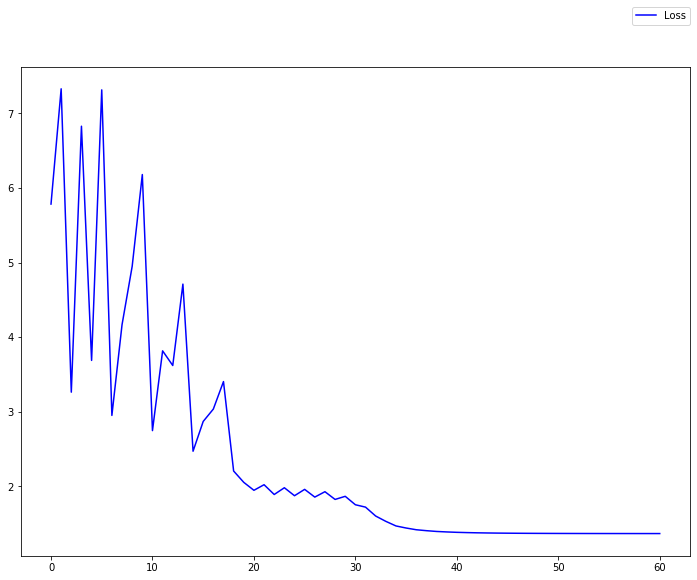

In [13]:
### 函数
tp(dLdz_alan(y2,z2))
tp(dydz(fun_loss(y2,need_print=False),z2,rate,need_print=False), tag='dydz(fun_loss(y2),z2,rate)')

def nn_bp(y, z, a, w, n, learn_rate, need_print=False):    
    delta=list(range(0,n)) # 误差因子
    dLdw=list(range(0,n-1))
    
    delta[n-1]=dLdz_alan(y, z[n-1])
    if need_print:
        tp(delta[n-1],tag='delta[{i}]'.format(i=n-1))
    for i in range(n-2,-1,-1): # 相当于 n-2 至 0
        # 计算顺序：误差因子delta(i)、损失函数对权重w(i)的偏导数dLdw、按梯度下降法更新w(i)
        
        if need_print:  
            print('\n\n')
            tps(i=i)
            tp(delta[i+1],tag='delta[{i}]'.format(i=i+1))
            tp(w[i],tag='w[{i}]'.format(i=i))            
        # 误差因子delta(i)
        dz  = sigmoid(z[i]) - multiply_pow(sigmoid(z[i]), 2)
        delta_multi_w = delta[i+1].T * w[i] # 注意此处不能先更新w，再使用其来计算误差因子
        if need_print:            
            tp(dz, tag='dz  = sigmoid(z[i]) - multiply_pow(sigmoid(z[i]), 2)')
            tp(delta_multi_w, tag= 'delta[i+1].T * w[i]')
        delta[i]= np.multiply(dz, delta_multi_w.T)
    
        if need_print:            
            tp(delta[i], tag='delta[i]= np.multiply(dz, delta_multi_w)')
        
        # 损失函数对权重w(i)的偏导数dLdw
        dLdw[i] = delta[i+1] * a[i].T
        
        # 按梯度下降法更新w(i)
        w[i] = w[i] - learn_rate * dLdw[i]
        
    return w

        


def nn_train(data_x, data_y, nn_node_of_layels, train_steps, learn_rate=0.05, display_times=10, need_print=False):
    nn_layels_count=len(nn_node_of_layels)
    sample_from = 0
    sample_cnt = sample_count
    x_in=get_data(data_x, sample_from, sample_cnt)
    y_in=get_data(data_y, sample_from, sample_cnt)
    weights = gene_rand_w(nn_node_of_layels)
    if False:
        tps(x_in=x_in,y_in=y_in)
    step_loss=dict()
    z, a = nn_fp(input_x=x_in, n=nn_layels_count, w=weights, need_print=False);
    if False:
        tp(z[nn_layels_count-1])
    step_loss[0] = Loss(y_in, z[nn_layels_count-1], get_average=True)
    for step in range(1, train_steps+1):
        weights = nn_bp(y=y_in, z=z, a=a, w=weights, n=nn_layels_count, learn_rate=learn_rate, need_print=False)
        z, a = nn_fp(input_x=x_in, w=weights, n=nn_layels_count, need_print=False);
        loss = Loss(y_in, z[nn_layels_count-1], get_average=True)
        step_loss[step] = loss
        
        if step % (train_steps/display_times)==0:
            tp(step_loss[step],tag='step_loss[{i}]'.format(i=step))
        
        if False:
            show_list(z)
            show_list(a)
    if need_print:
        for step in range(len(step_loss)):
            tp(step_loss[step],tag='step_loss[{i}]'.format(i=step))
    show_dict(step_loss,y_label='Loss')
    if need_print:
        tp(step_loss[train_steps])
    return step_loss


sample_count=50
x_size=15
y_size=2
data_x,data_y = gene_input_data(sample_count=sample_count, x_size=x_size, y_size=y_size, x_min=10,x_max=50)
# tps(data_x=data_x, data_y=data_y)
        
nn_node_of_layels=np.array([data_x.shape[1],10,10,10,data_y.shape[1]])
tp(nn_node_of_layels)


step_loss = nn_train(data_x = data_x, data_y = data_y, nn_node_of_layels = nn_node_of_layels, 
         train_steps = 60, learn_rate = 0.05, need_print=False)



# nn_tensorflow_graph

In [14]:
# wj 20190524
tf.reset_default_graph()
# x_in: (None,3072)
x_in=tf.placeholder(tf.float32,[None,3072])
# y_in: (None)
y_in=tf.placeholder(tf.int32,[None])
w=tf.get_variable('w',[x_in.shape[-1],1],initializer=tf.random_normal_initializer(0,1))
b=tf.get_variable('b',[1],initializer=tf.constant_initializer(0.0))
# y_out: (None,3072)*(3072,1)=(None,1)
y_out=tf.matmul(x_in,w)+b
py=tf.nn.sigmoid(y_out)
# py_reshaped: (None)
py_reshaped=tf.reshape(py,[-1])
loss=tf.reduce_mean(tf.square(py_reshaped-tf.cast(y_in,tf.float32)))
predict=py_reshaped>0.5
predict_correct=tf.equal(tf.cast(predict,tf.int32),y_in)
accuracy=tf.reduce_mean(tf.cast(predict_correct,tf.float32))

with tf.name_scope('train_op'):
    train_op=tf.train.AdamOptimizer(1e-3).minimize(loss)
    
init=tf.global_variables_initializer()

train_filenames = [os.path.join(CIFAR_DIR, 'data_batch_%d' % i) for i in range(1, 6)]
test_filenames = [os.path.join(CIFAR_DIR, 'test_batch')]

train_data = CifarData(train_filenames, True)
test_data = CifarData(test_filenames, False)

class_names=["airplane","auto","bird","cat","deer","dog","frog","horse","ship","truck"];
print(time_now())
# train_steps=10000
# xs=20
# min_train_batch_size=1
# # train_batch_size= train_data.len*xs//train_steps
# train_batch_size=128
# train_batch_size= (train_batch_size>train_data.len)and train_data.len or train_batch_size
# train_batch_size= (train_batch_size<min_train_batch_size)and min_train_batch_size or train_batch_size
# # print('train_batch_size = ',train_batch_size)



AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

## show_dicts 曲线图

In [ ]:
DICT_KEY='dic'
FIG_LABEL='label'
X_LABEL='x'
Y_LABEL='y'

def show_dicts(dicts, figsize = (12,9), in_one_figure = True):
    if in_one_figure:
        plt.figure(figsize=figsize)
    index = 0
    for d in dicts:          
        if not in_one_figure:
            index += 1
            plt.figure(num=index,figsize=figsize)
        plt.plot(d[DICT_KEY].keys(), d[DICT_KEY].values())
        if not in_one_figure:
            if X_LABEL in d:
                plt.xlabel(d[X_LABEL])
            if Y_LABEL in d:
                plt.ylabel(d[Y_LABEL])
    plt.show()

train_filenames = [os.path.join(CIFAR_DIR, 'data_batch_%d' % i) for i in range(1, 6)]
test_filenames = [os.path.join(CIFAR_DIR, 'test_batch')]
train_data = CifarData(train_filenames, True)
test_data = CifarData(test_filenames, False)

def train_1(train_steps, batch_size, 
            watch_times = 10, test_times = 50, max_not_progress = 3, print_watch = False):
    if print_watch :
        print('----- Start at %s'%(time_now()))
        print('Train steps: %lu, Train batch size: %lu, Test times: %lu' % 
              (train_steps, batch_size, test_times))
    time_begin=monotonic()
    loss_dict = dict()
    acc_dict = dict()
    with tf.Session() as sess:
        sess.run(init)
        for i in range(1, train_steps + 1):
            # Train
            batch_data, batch_labels = train_data.next_batch(batch_size)            
            [loss_val, acc_val, _] = sess.run([loss, accuracy, train_op], feed_dict = {
                x_in: batch_data, y_in: batch_labels})
            if i % (train_steps // test_times) == 0:
                # Test
                test_data = CifarData(test_filenames, False)
                test_batch_data, test_batch_labels = test_data.next_batch(test_data.len)                
                [loss_val, acc_val] = sess.run([loss, accuracy], feed_dict = {
                    x_in: test_batch_data, y_in: test_batch_labels})
                if i % (train_steps // watch_times) == 0:
                    if print_watch :
                        print('curr_step: %-6lu, loss_val: %5.4f, acc_val: %5.4f'%(i, loss_val, acc_val))
                loss_dict[i] = loss_val
                acc_dict[i]  = acc_val
    if print_watch :
        print('----- End at %s'%(time_now(time_begin)))
    time_end = monotonic()
    elaps = time_end - time_begin
    return loss_dict, acc_dict, elaps

def TEST_train_1():
    loss_dict, acc_dict, elaps = train_1(train_steps = 5000, batch_size = 20, test_times = 6, watch_times = 2, print_watch = True)
    dicts = [dict([(DICT_KEY, loss_dict), (FIG_LABEL, 'loss_fig'), (X_LABEL, 'step'), (Y_LABEL, 'loss')]), 
           dict([(DICT_KEY, acc_dict),  (FIG_LABEL, 'acc_fig'),  (X_LABEL, 'step'), (Y_LABEL, 'accuracy')])]
    show_dicts(dicts = dicts, figsize = (16,5), in_one_figure = False)

## train_and_analysis

In [ ]:
def train_and_analysis(train_steps,batch_size,test_times,
                       watch_times=10,figsize=(9,12),in_one_figure=True):
    
    loss_dict, acc_dict, elaps = train_1(train_steps = train_steps, batch_size = batch_size, 
                                  watch_times = watch_times, test_times = test_times, print_watch = True)
    
    dicts=[dict([(DICT_KEY, loss_dict), (FIG_LABEL, 'loss_fig'), (X_LABEL, 'step'), (Y_LABEL, 'loss')]), 
           dict([(DICT_KEY, acc_dict),  (FIG_LABEL, 'acc_fig'),  (X_LABEL, 'step'), (Y_LABEL, 'accuracy')])]
    
    show_dicts(dicts = dicts, figsize = figsize, in_one_figure = in_one_figure)

    return loss_dict,acc_dict

# train_steps=100000
# batch_size=4
# test_times=200
# train_and_analysis(train_steps = train_steps, batch_size = batch_size, test_times = test_times)
train_data = CifarData(train_filenames, True)
test_data = CifarData(test_filenames, False)

def TEST_train_and_analysis():
    for i in range(4,5):
        epoch = 1
        batch_size = 2 ** i
        train_steps = int(epoch * train_data.len / batch_size * (math.log(batch_size) if batch_size > 3 else 1))
        test_times = 4
        watch_times = 2
        loss_dict,acc_dict = train_and_analysis(train_steps = train_steps, batch_size = batch_size, 
                                                test_times = test_times, watch_times = watch_times,
                                                figsize = (16,6), in_one_figure = False)
    

In [ ]:
#wj
def train(train_steps,batch_size,watch_times=10,max_not_progress=3,print_watch=False):
    time_begin=monotonic()
    watch_period = train_steps//watch_times
    accuracy_dict=dict()
    not_progress = 0
    with tf.Session() as sess:
        sess.run(init)
        if print_watch :
            print('***** Start at %s'%(time_now()))
            print('Train steps: %6u \t Train batch size: %6u' % (train_steps, batch_size))    
        for i in range(1,train_steps+1):        
            data,labels=train_data.next_batch(batch_size)
            loss_val,accuracy_val,_=sess.run([loss,accuracy,train_op],feed_dict={x_in:data,y_in:labels})            
            
            if i % ((watch_period==0)and 1 or watch_period) ==0 or i==train_steps :    
                if print_watch :
                    print('Train: No. %5u, accuracy = %4.5f, loss_val = %4.5f' % (i,accuracy_val,loss_val))    
                test_data = CifarData(test_filenames, False)
                data,labels=test_data.next_batch(test_data.len)
                his_max = (0 if (len(accuracy_dict)==0) else max(accuracy_dict.values()))
                accuracy_dict[i],_ = sess.run([accuracy,loss],feed_dict={x_in:data, y_in:labels})
                if print_watch :
                    print('Test:  No. %5u, accuracy = %4.5f ***' % (i,accuracy_dict[i]))    
                if accuracy_dict[i] <= his_max:
                    not_progress+=1
                if max_not_progress != 0 and not_progress >= max_not_progress:
                    break
    if print_watch :
        print('***** End at %s'%(time_now()))
    time_end=monotonic()
    elaps = time_end - time_begin
    return max(accuracy_dict.values()),elaps,accuracy_dict

def TEST_train():
    print('--------- BEGIN %s---------' % (time_now()))
    begin_time = get_timestamp()
    for i in range(6,7):
        batch_size_para = 2 ** i
    #     steps = 100 * 10000
        steps = 2000
        acc,elaps,accuracy_dict = train(train_steps=steps,batch_size=batch_size_para,watch_times=50,max_not_progress=20,print_watch=False)
        print('batch_size=%3d,acc=%4.5f,use_steps=%7d,elaps=%5ds' % (batch_size_para, acc, max(accuracy_dict.keys()), elaps / ((10 ** 9) if LOCATE == 'home' else 1)))
    print('---------- END %s----------' % (time_now(begin_time)))

In [ ]:
x=[5,1.2,5.2,1.5,4.4,3]
a=tf.nn.softmax(x)
aa = tf.Session().run(a)
print(aa)

In [ ]:
a=range(12)
print('a.type',type(a))
a=list(a)
print('a.type',type(a))
na=np.array(a)
ta=tf.convert_to_tensor(a)
print('ta.type',type(ta),ta.shape)
ta2=tf.reshape(ta,(-1,1))
print('ta2.type',type(ta2),ta2.shape)
ta3=tf.reshape(ta2,[-1])
print('ta3.type',type(ta3),ta3.shape)

In [ ]:
a=1
my_list=['Jie','Kate','Jing']
print(my_list,a)
def func_20190525(the_list,a):
    a=2
    the_list[0]='Alan'
    print(the_list,a)
func_20190525(my_list,a)
print(my_list,a)
list2=my_list
print('list2:',list2)
print('my_list:',my_list)
list2.append('Alan K. Wen')
print('list2:',list2)
print('my_list:',my_list)

In [ ]:
from copy import deepcopy
a=[[1,2],[2],[3]]
b0=a # 赋值
b1=a[:] # 浅拷贝
b2=deepcopy(a) # 深拷贝
print('addr a,b0,b1,b2',[id(x) for x in [a,b0,b1,b2]])
print('addr a[i]',[id(x) for x in a])
print('addr b0[i]',[id(x) for x in b0])
print('addr b1[i]',[id(x) for x in b1])
print('addr b2[i]',[id(x) for x in b2])
a[0].append(1)
'''不可变的对象修改会开辟新的空间，可变的对象修改不会开辟新空间。也进一步证明了浅拷贝仅仅是复制了容器中元素的地址。'''
# 　　1. 赋值是将一个对象的地址赋值给一个变量，让变量指向该地址（旧瓶装旧酒）。
# 　　2. 浅拷贝是在另一块地址中创建一个新的变量或容器，但是容器内的元素的地址均是源对象的元素的地址的拷贝。也就是说新的容器中指向了旧的元素（新瓶装旧酒）。
# 　　3. 深拷贝是在另一块地址中创建一个新的变量或容器，同时容器内的元素的地址也是新开辟的，仅仅是值相同而已，是完全的副本。也就是说（新瓶装新酒）。
print('--- After a[0].append(1). ---')
print('a:',a)
print('b0:',b0)
print('b1:',b1)
print('b2:',b2)
print('addr a[i]',[id(x) for x in a])
print('addr b0[i]',[id(x) for x in b0])
print('addr b1[i]',[id(x) for x in b1])
print('addr b2[i]',[id(x) for x in b2])
a[0]=1
print('--- After a[0]=1. ---')
print('a:',a)
print('b0:',b0)
print('b1:',b1)
print('b2:',b2)
print('addr a[i]',[id(x) for x in a])
print('addr b0[i]',[id(x) for x in b0])
print('addr b1[i]',[id(x) for x in b1])
print('addr b2[i]',[id(x) for x in b2])
print('\n',time_now())

In [ ]:
print('\n----------END---------{time}-------------\n'.format(time=time_now()))

# END